First 5 rows of the dataset:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

Summary statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69

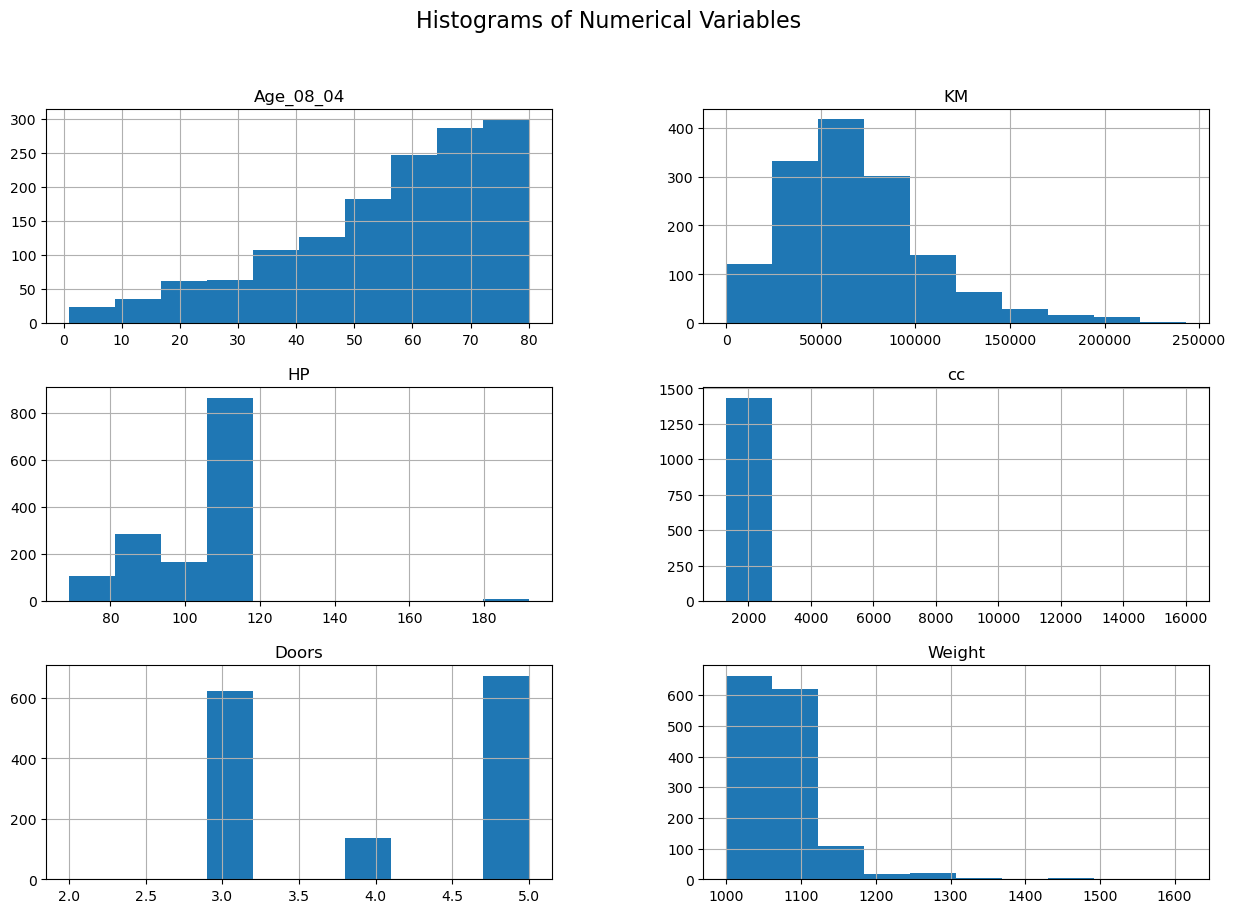

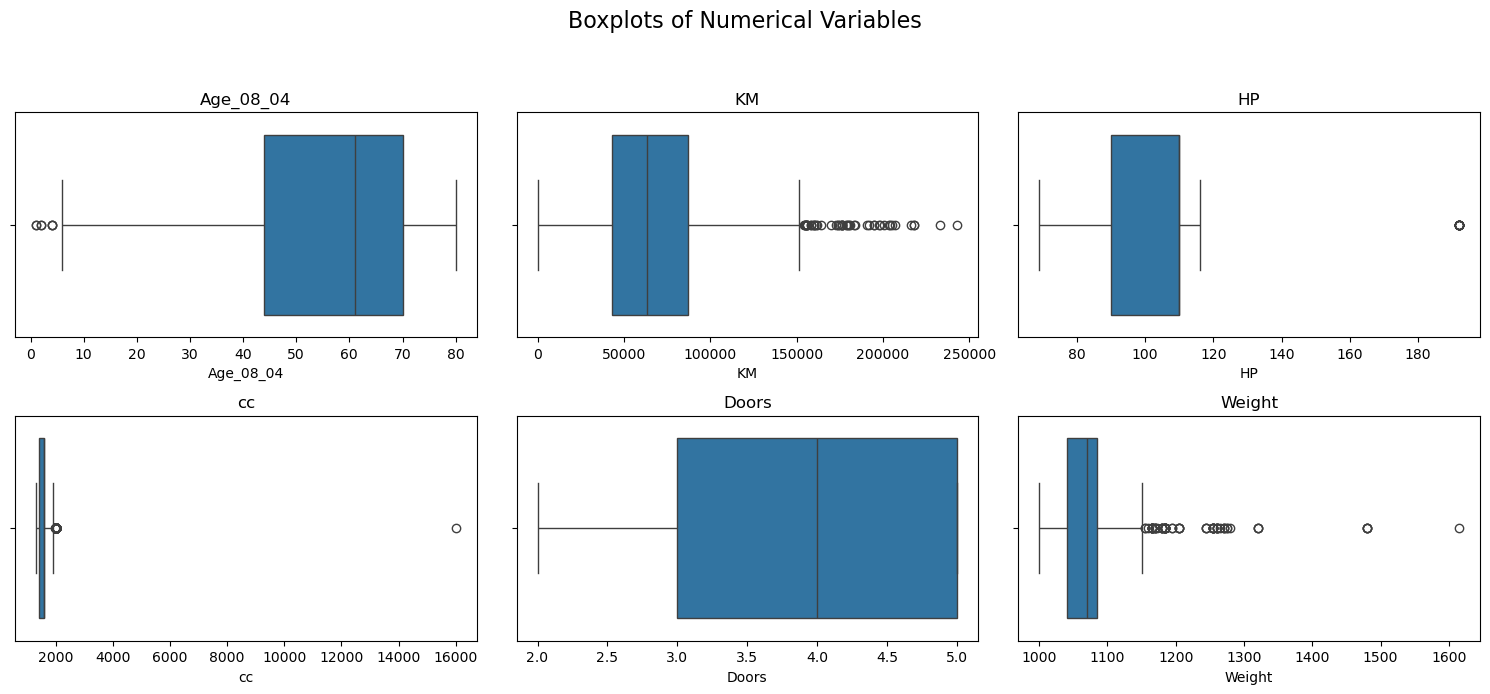

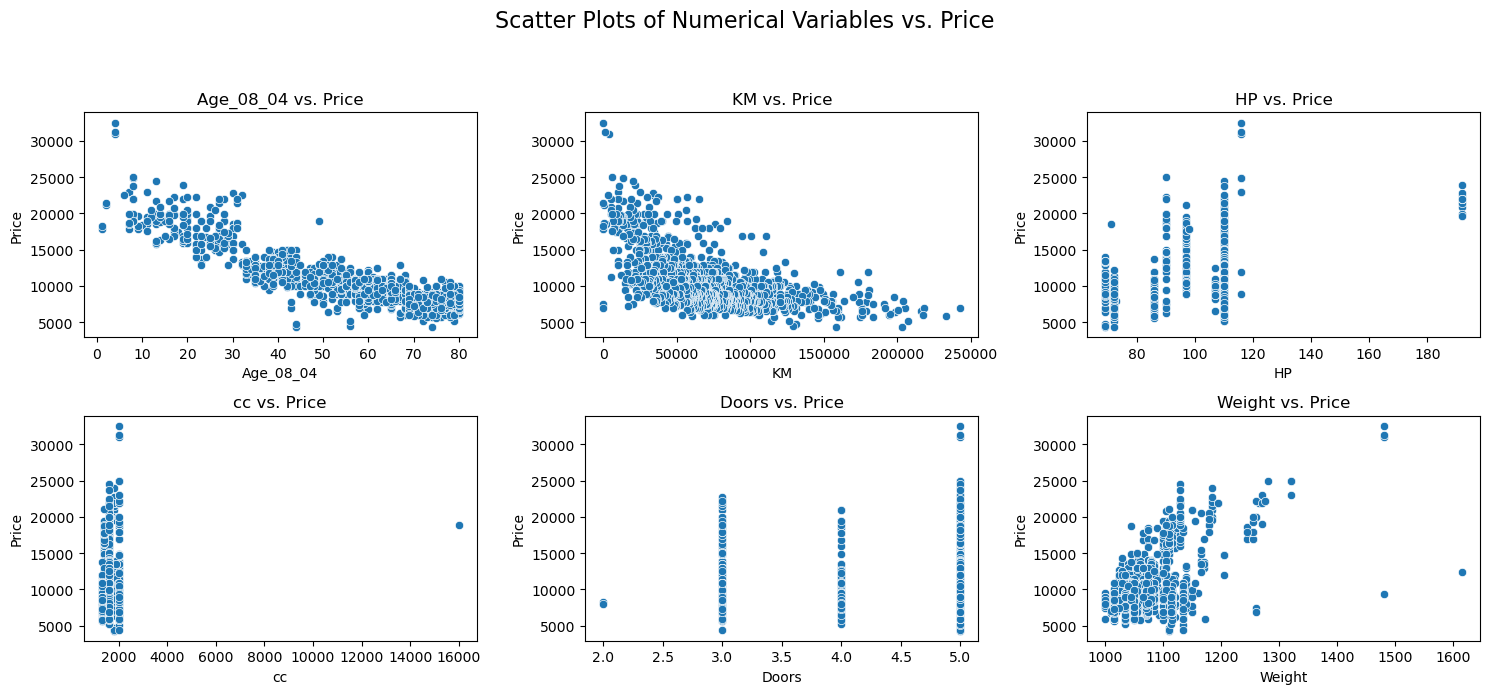

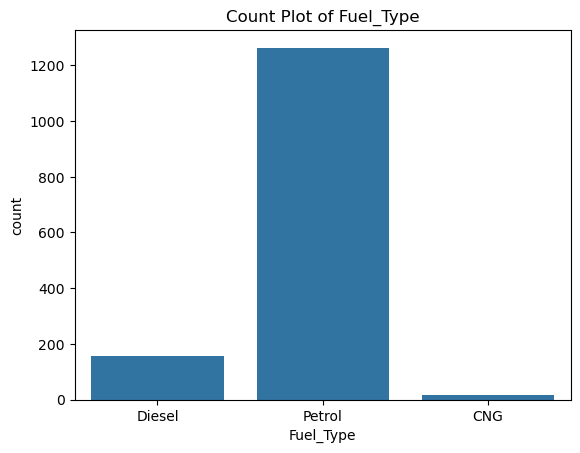

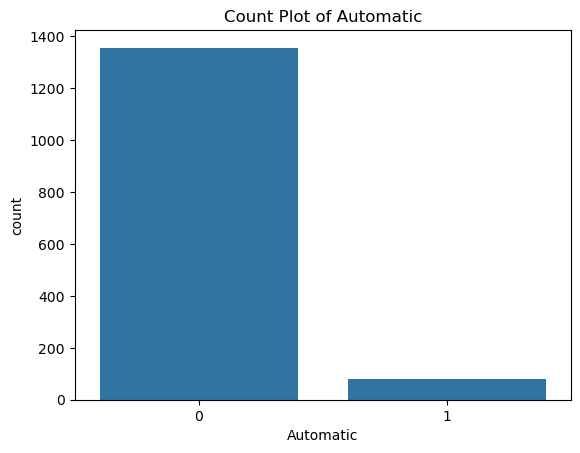

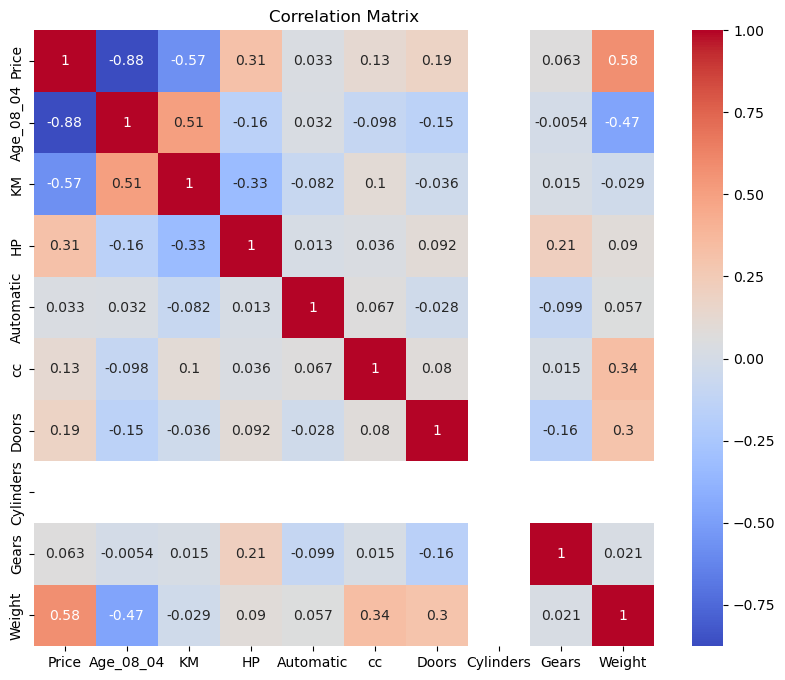


Coefficients for Model 1 (Linear Regression):
Age_08_04: -2267.2947825060987
KM: -611.6544115414324
HP: 208.34985789082285
Automatic: 34.39712978861664
cc: -14.161916634022123
Doors: -57.467803854519396
Cylinders: 2.8421709430404007e-13
Gears: 109.3404169504545
Weight: 1316.8183107641707
Fuel_Type_Diesel: -68.54875675828822
Fuel_Type_Petrol: 1370.80890981598

Linear Regression Evaluation:
Mean Squared Error: 2203043.823143704
R-squared: 0.8348888040611081

Ridge Regression Evaluation:
Mean Squared Error: 2197493.743144746
R-squared: 0.8353047650767528

Lasso Regression Evaluation:
Mean Squared Error: 2202045.398998935
R-squared: 0.8349636328061677


(2202045.398998935, 0.8349636328061677)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Exploratory Data Analysis (EDA) and Preprocessing
df = pd.read_csv("C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\MLR\\MLR\\ToyotaCorolla - MLR.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)

# Visualizations
# Histograms for numerical variables
numerical_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']
df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.suptitle('Boxplots of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Scatter plots for numerical variables vs. Price
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'{col} vs. Price')
plt.suptitle('Scatter Plots of Numerical Variables vs. Price', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Count plot for Fuel_Type
sns.countplot(x='Fuel_Type', data=df)
plt.title('Count Plot of Fuel_Type')
plt.show()

# Count plot for Automatic
sns.countplot(x='Automatic', data=df)
plt.title('Count Plot of Automatic')
plt.show()

# Correlation matrix
numerical_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing
# One-hot encode FuelType
# Select features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['Fuel_Type']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build Multiple Linear Regression Models
# Model 1: Basic Linear Regression
model1 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
model1.fit(X_train, y_train)

# Model 2: Ridge Regression
model2 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Ridge(alpha=1.0))])  # Alpha is the regularization strength
model2.fit(X_train, y_train)

# Model 3: Lasso Regression
model3 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Lasso(alpha=0.1))])  # Alpha is the regularization strength
model3.fit(X_train, y_train)

# Interpret coefficients (for basic linear regression)
print("\nCoefficients for Model 1 (Linear Regression):")
# After preprocessing, the column names are not directly available.
# To get the names, we need to extract them from the preprocessor.
numerical_cols_scaled = numerical_features
categorical_cols_encoded = list(model1.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
all_cols = numerical_cols_scaled + categorical_cols_encoded
coefs = model1.named_steps['regressor'].coef_
for feature, coef in zip(all_cols, coefs):
    print(f"{feature}: {coef}")

# 4. Evaluate the performance of the models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    return mse, r2

evaluate_model(model1, X_test, y_test, "Linear Regression")
evaluate_model(model2, X_test, y_test, "Ridge Regression")
evaluate_model(model3, X_test, y_test, "Lasso Regression")

# 5. Apply Lasso and Ridge methods (already done in models 2 and 3)
# Additional tuning of alpha can be done to improve performance.

# Assumptions and Implications
# 1. Linearity: We assume a linear relationship between the independent and dependent variables. Scatter plots were used to check for this.
# 2. Independence: We assume that the errors are independent. Correlation matrix was used to identify potential multicollinearity.
# 3. Homoscedasticity: We assume that the variance of the errors is constant. Residual plots can be used to further evaluate this.
# 4. Normality of errors: We assume that the errors are normally distributed. Q-Q plots can be used to assess this.
# 5. No perfect multicollinearity: High correlation between independent variables can impact the stability of the model. Correlation matrix was used to check this.
# 6. Appropriate Feature Selection: The relevance of features was based on domain knowledge and EDA. Further feature engineering could improve the model.
# 7. Data Quality: The model's performance relies on the quality of the data. Outliers and missing values can affect the results.
# 8. Data Splitting: The data was split into training and testing sets to evaluate the model's generalization performance.
# 9. Regularization: Ridge and Lasso regularization were used to prevent overfitting and improve model stability. The alpha parameter was tuned to control the strength of regularization.
# 10. One Hot Encoding: The categorical feature 'FuelType' was one hot encoded, creating additional features.
# 11. Scaling: Numerical features were scaled to improve model performance and convergence.
